In [61]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [62]:
df = pd.read_csv('Mall_Customers.csv')

In [63]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [66]:
df = df.drop(['CustomerID'], axis=1)

In [67]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24dcd9b0>,
      dtype=object)

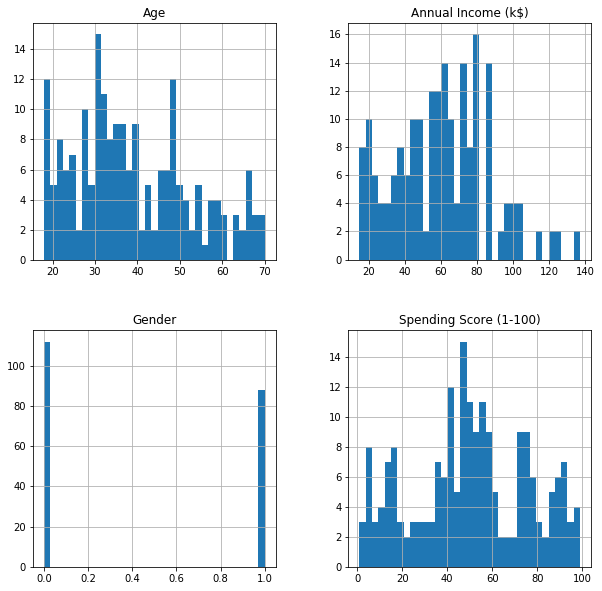

In [68]:
df.hist(figsize=(10, 10), bins=35)

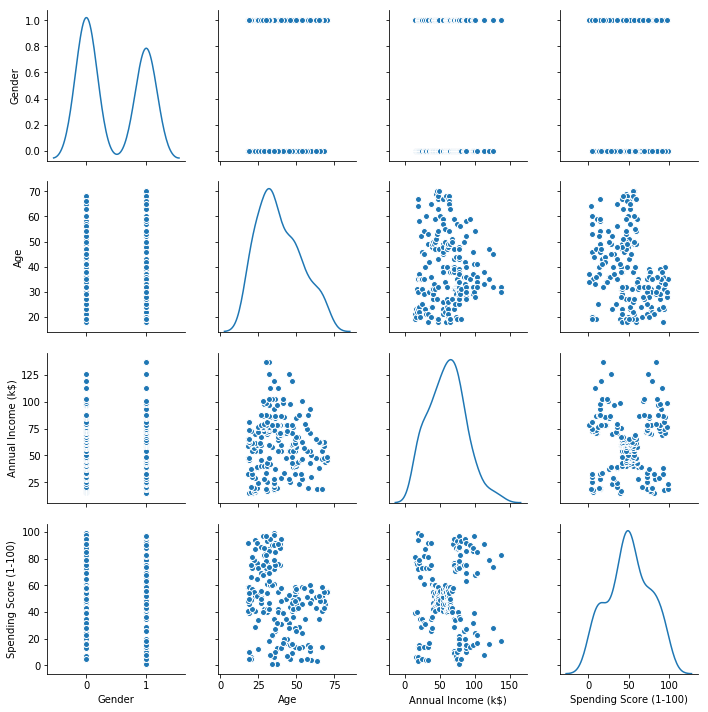

In [69]:
sns.pairplot(df, diag_kind="kde")

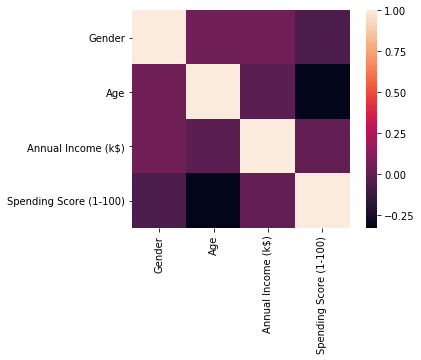

In [70]:
sns.heatmap(df.corr(), square=True)

In [71]:
tsne = TSNE(random_state=2019)
tsne_representation = tsne.fit_transform(df)

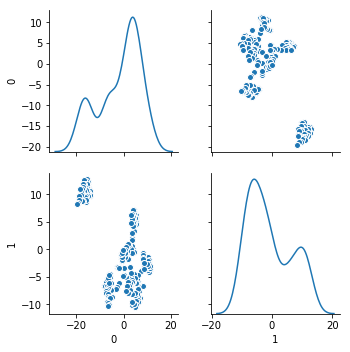

In [72]:
tsne_representation = pd.DataFrame(tsne_representation)
sns.pairplot(tsne_representation, diag_kind="kde")

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


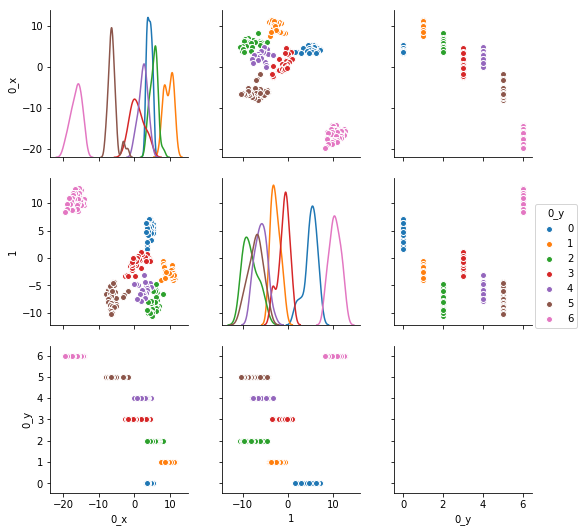

In [73]:
clustering = AffinityPropagation(damping=0.9, max_iter=200).fit(tsne_representation)
lbl = clustering.labels_
lbl = pd.DataFrame(lbl)
df_transformed = tsne_representation.merge(lbl, how='left', left_index=True, right_index=True)
sns.pairplot(df_transformed, hue="0_y", diag_kind="kde")

In [81]:
y_train_df = clustering.labels_
y_train_df = pd.DataFrame(lbl)

In [75]:
from sklearn.model_selection import TimeSeriesSplit,KFold
n_fold = 5
folds = KFold(n_splits=n_fold,shuffle=True)

print(folds)

KFold(n_splits=5, random_state=None, shuffle=True)


In [82]:
pred = 0


for fold_n, (train_index, valid_index) in enumerate(folds.split(X_train)):
    clf = DecisionTreeClassifier(random_state=2019)
    
    X_train_, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_, y_valid = y_train_df.iloc[train_index], y_train_df.iloc[valid_index]
    clf.fit(X_train_,y_train_)

    del X_train_,y_train_
    pred += clf.feature_importances_
    
    del clf, X_valid
    del y_valid
prediction = pred/n_fold
print (prediction)

[0.03476882 0.31191919 0.34598897 0.30732302]


In [83]:
trn = pd.DataFrame(X_train)
tst = pd.DataFrame(X_test)
dct = dict(zip(trn.columns, prediction))

In [84]:
dct

{'Gender': 0.034768817076490564,
 'Age': 0.31191919376464866,
 'Annual Income (k$)': 0.34598896930536294,
 'Spending Score (1-100)': 0.3073230198534979}

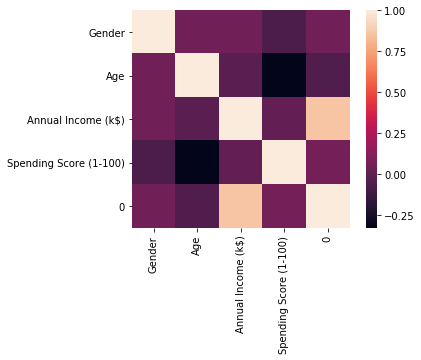

In [110]:
plot_df = df.merge(y_train_df, how='left', left_index=True, right_index=True)
sns.heatmap(plot_df.corr(), square=True)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


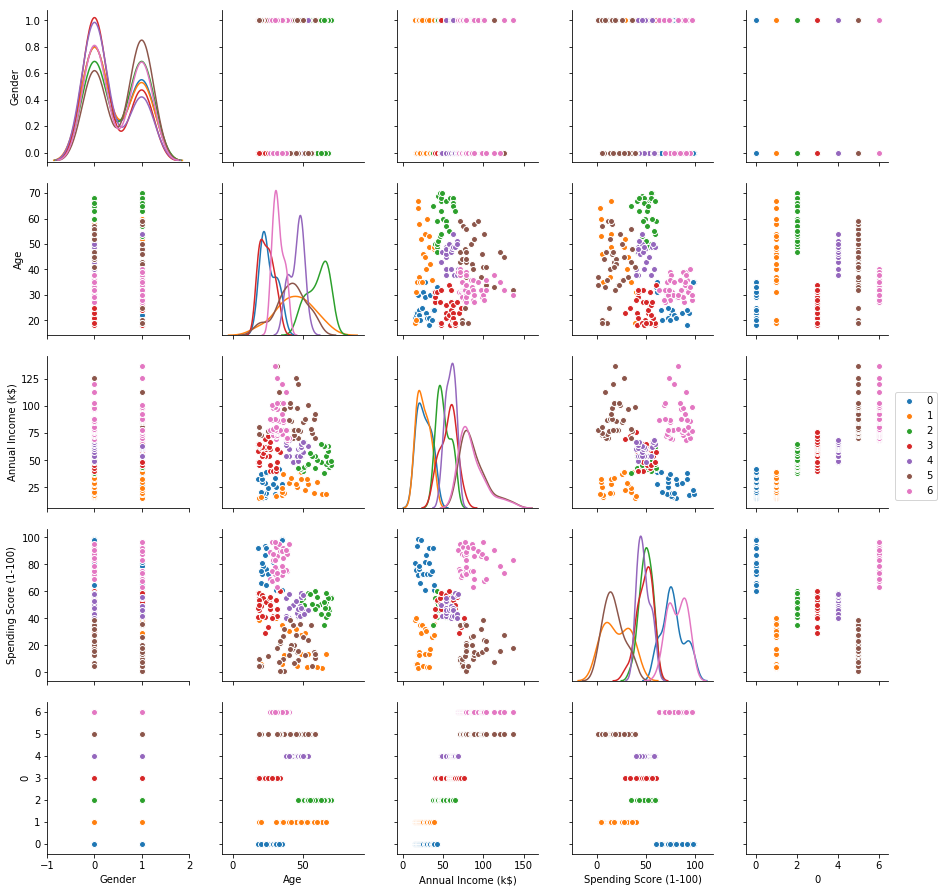

In [111]:
sns.pairplot(plot_df, hue=0, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a246487b8>]],
      dtype=object)

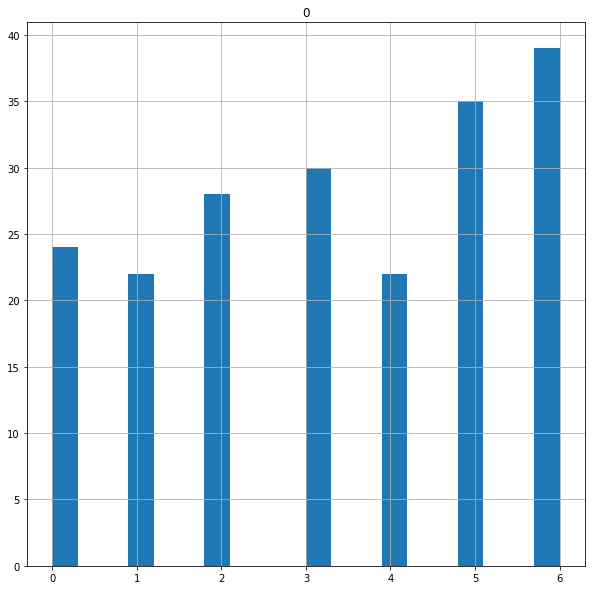

In [126]:
y_train_df.hist(figsize=(10, 10), bins=20)